# Star Spectrum Analysis Using a Canon Xsi, Star Analyzer 100 and Celestron Telescope

This matplotlib and scipy method seems to work well. I can easily read in a jpg. I think flatten=0 means to keep the RGB layers in the data matrix. flatten=1 makes a 2D matrix. Does it sum RGB?

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:11: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:13: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


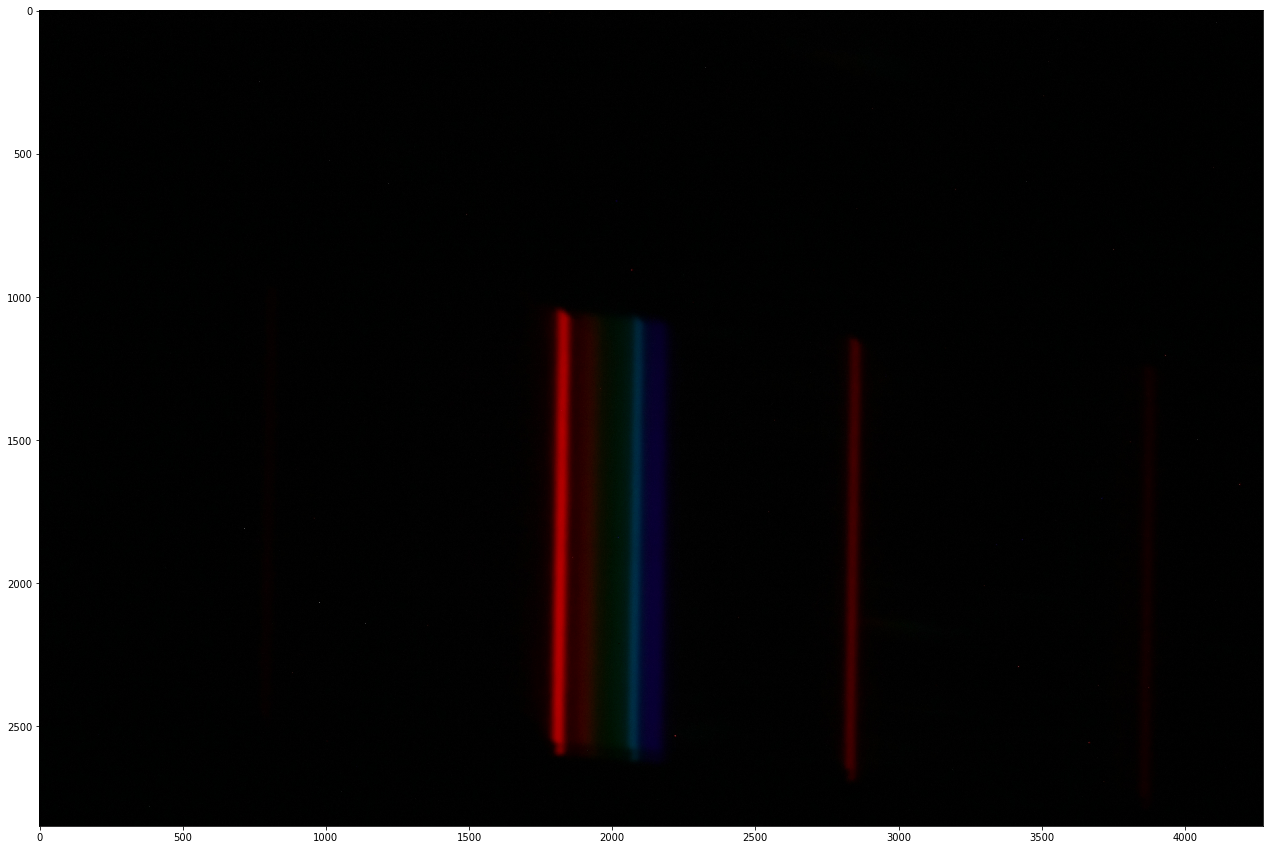

In [2]:
import matplotlib #import imshow, figure, zeros, plot
import scipy.ndimage
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
from scipy.misc import imread
#import imageio #replaces scipy imread
from scipy.ndimage.interpolation import rotate
from numpy import savetxt
 
#hydrogen_image = imread("/home/nbuser/library/IMG_0011.JPG",flatten=0) #IMG_0011 is too bright
hydrogen_image = imread("/home/nbuser/library/IMG_0006.JPG",flatten=0)
#hydrogen_image = #imageio.imread("/home/nbuser/library/IMG_0011.JPG",flatten=0)
altair_image = imread("/home/nbuser/library/IMG_0027.JPG",flatten=0)
plt.figure(figsize=(26, 15))
plt.imshow(hydrogen_image)
plt.show()


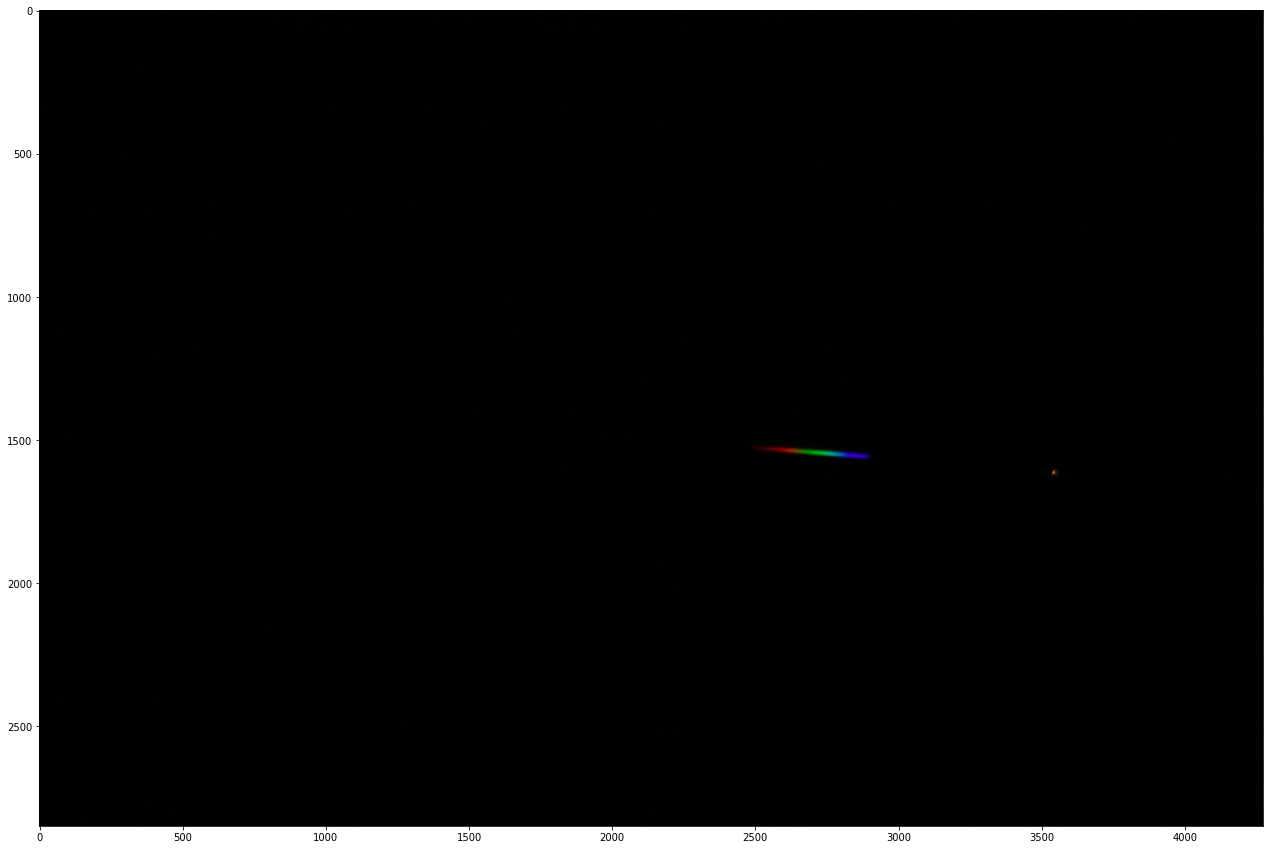

In [3]:
plt.figure(figsize=(26, 15))
plt.imshow(altair_image)
plt.show()

Let's see if we can create a crop that zooms in on the spectrum at the bottom of the image. I'm using the pixels from the original image plot. I'm also adding a line to the plot and adjusting it until it runs along the spectrum. Once I have that, I should be able to collect RGB along the line and store them in an array.

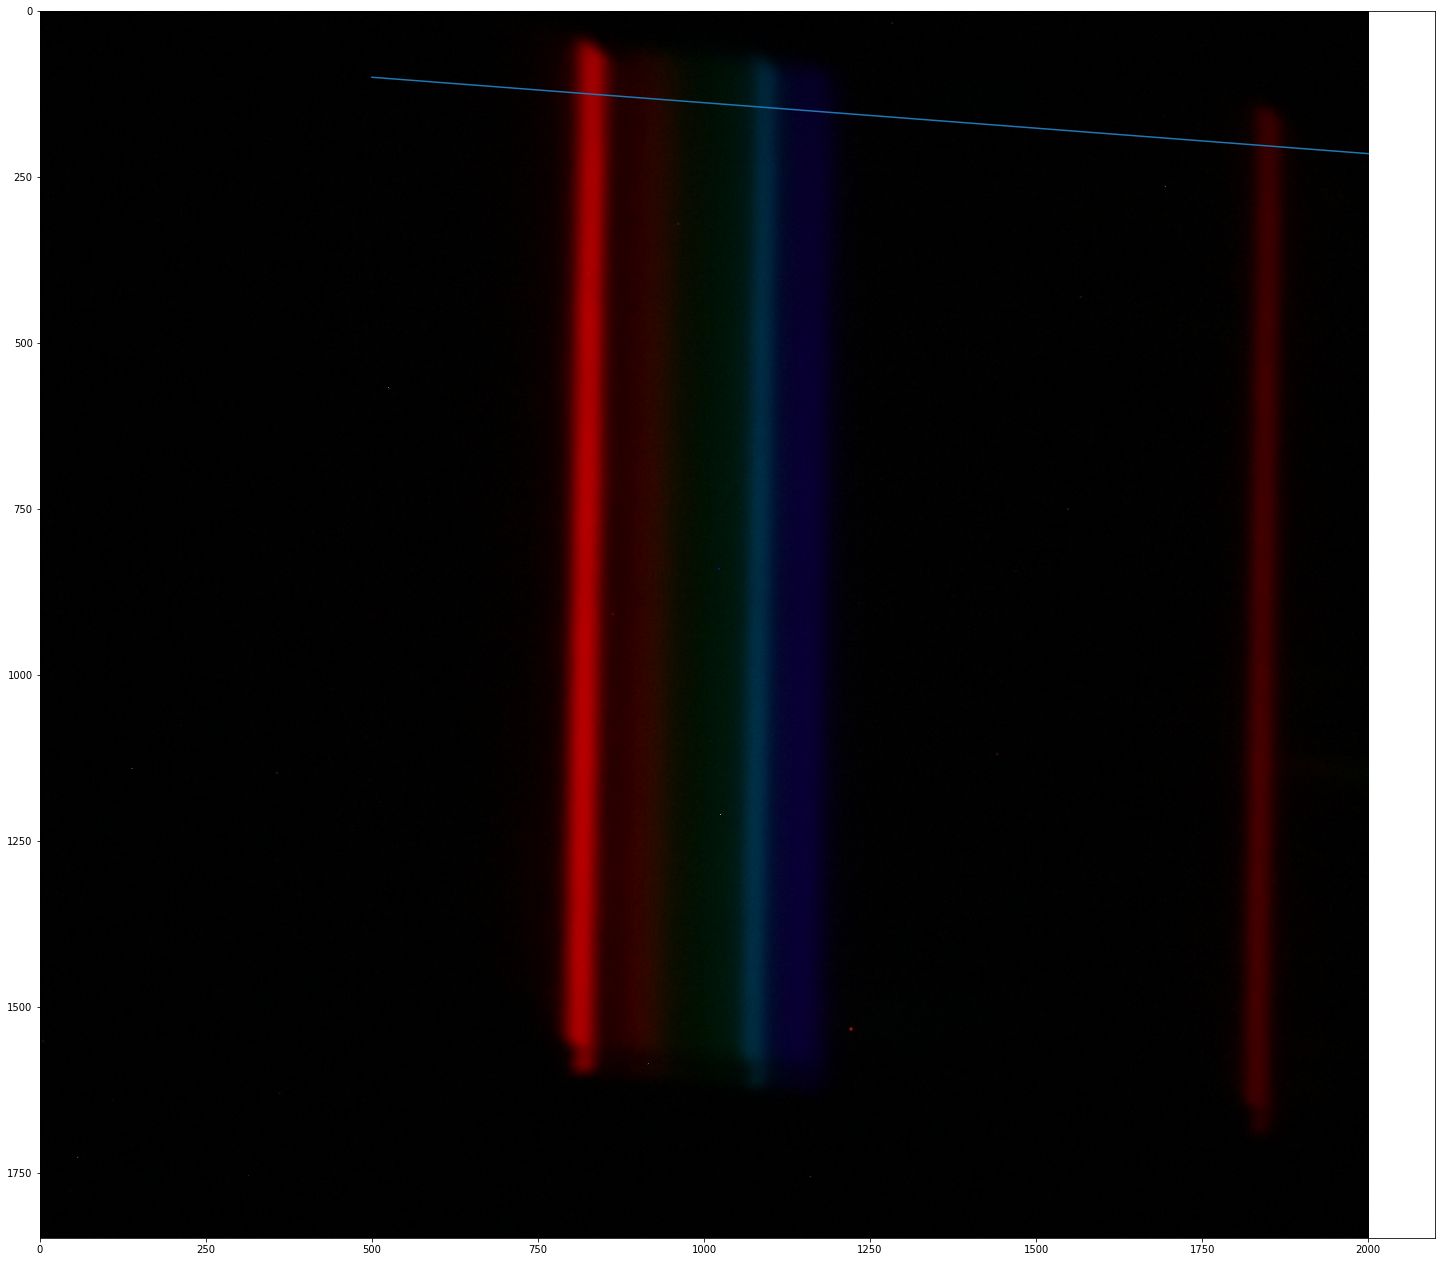

In [4]:
cropH = hydrogen_image[1000:3000,1000:3000]
plt.figure(figsize=(25, 25))
plt.imshow(cropH)
linex = [500,2000]
liney = [100,215]
plt.plot(linex,liney)
plt.show()

Okay, let's do a similar cropping and line for the star image.

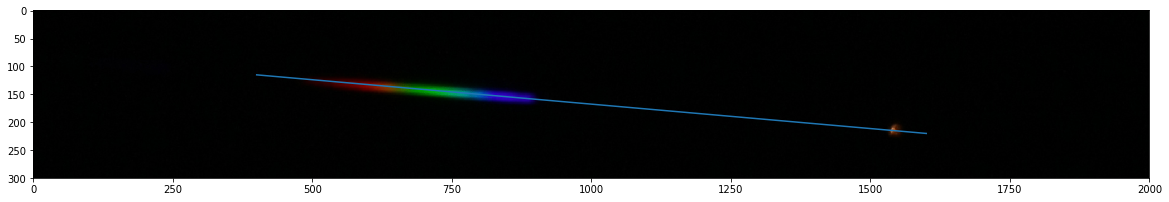

In [5]:
cropAltair = altair_image[1400:1700,2000:4000]
plt.figure(figsize=(20, 60))
plt.imshow(cropAltair)
linexA = [400,1600]
lineyA = [115,220]
plt.plot(linexA,lineyA)
plt.show()

The image displays with linex on the horizontal and liney on the vertical as I've defined linex and liney. We need to know the line that is defined by the linex and liney arrays.
$$y = m x + b,$$

$$y = \frac{\Delta y}{\Delta x} x + b,$$

$$ y = \frac{liney[1]-liney[0]}{linex[1]-linex[0]} x + b.$$

$$m = \frac{215-100}{2000-500} = 0.076$$

Since
$$y(2000) = 0.076 \times 2000 + b = 215$$

and

$$y(500) = 0.076 \times 500 + b = 100$$

$$b = 61.67$$

Just to check our math, let's plot a line on the linex and liney points.

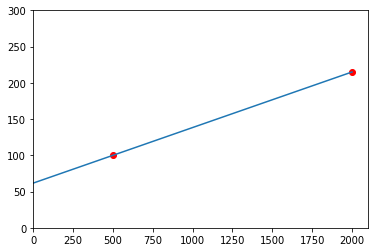

In [6]:
plt.plot(linex, liney, 'ro')
plt.plot([0,2000], [61.67, 215])
plt.axis([0, 2100, 0, 300])
plt.show()

That should be close enough. Now let's see if we can get the pixel intensities along the line. The jpg image is a 3D array of [[red, green, blue][x][y]]. Let's first separate red, green, blue into separate arrays. Alternatively, we could add them to make one layer, but it'll be nice to check that we've got everything right if we slice up the rgb image.

In [7]:
#Let's define the line parameters so we can use them later.
slopeH = 0.0766
interceptH = 61.67

x rows = 1848
y columns = 2000
z layers = 3


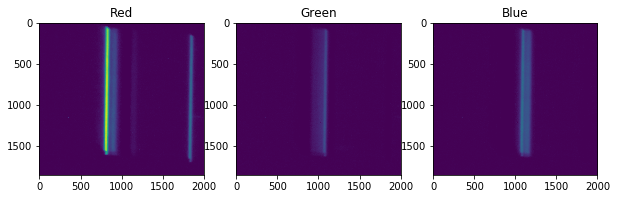

In [8]:
import numpy as np
arrH = np.array(cropH)
x, y, z = arrH.shape
print("x rows =", x)
print("y columns =", y)
print("z layers =", z)

dataH = np.zeros((x*y, 5)) #Why is the data 5 deep? It should be 3 for RGB
redH = cropH[:,:,0]
greenH = cropH[:,:,1]
blueH = cropH[:,:,2]
#pixels = crop.load()
#for i in range(x):
#    for j in range(y):
#        red =  crop[i,j,0]
#        green = crop[i,j,1]
#        blue = crop[i,j,2]
#        data[i*col + j,:] = r,g,b,i,j

fig = plt.figure(figsize=(10, 20))
a=fig.add_subplot(1,3,1)
imgplot = plt.imshow(redH)
a.set_title('Red')
b=fig.add_subplot(1,3,2)
imgplot = plt.imshow(greenH)
b.set_title('Green')
c=fig.add_subplot(1,3,3)
imgplot = plt.imshow(blueH)
c.set_title('Blue')
plt.show()

Cool! That worked. If you refer back to the original image, red was on top; green in the middle; and blue was on bottom. Now, let's get the values along the line we drew.

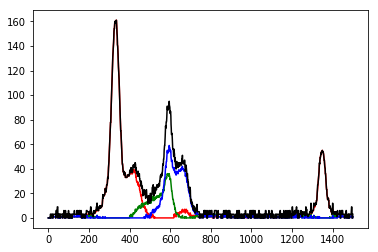

In [9]:
rarrH = np.array(redH)
garrH = np.array(greenH)
barrH = np.array(blueH)
xmin = linex[0]
xmax = linex[1]
ymin = liney[0]
ymax = liney[1]
npts = xmax-xmin
profile_redH = np.zeros((npts))
profile_greenH = np.zeros((npts))
profile_blueH = np.zeros((npts))
for i in range(npts):
    pixelx = xmin + i
    pixely = round(slopeH * (xmin + i) + interceptH) # We need to round because it's a pixel.
#    print (pixelx)
#    print (pixely)
    profile_redH[i] = rarrH[pixely,pixelx]
    profile_greenH[i] = garrH[pixely,pixelx]
    profile_blueH[i] = barrH[pixely,pixelx]
profile_sumH = profile_redH + profile_greenH + profile_blueH
plt.plot(profile_redH, 'r', profile_greenH, 'g', profile_blueH, 'b', profile_sumH, 'k')
plt.show()

The data is in reverse wavelength order. Let's reverse it so it is intuitive.

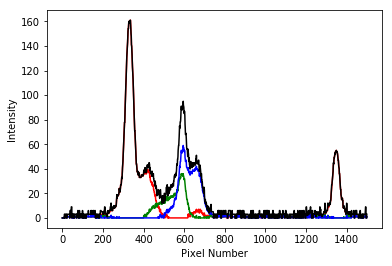

In [22]:
profile_redH = profile_redH[::-1]
profile_greenH = profile_greenH[::-1]
profile_blueH = profile_blueH[::-1]
profile_sumH = profile_sumH[::-1]
plt.plot(profile_redH, 'r', profile_greenH, 'g', profile_blueH, 'b', profile_sumH, 'k')
plt.xlabel('Pixel Number')
plt.ylabel('Intensity')
plt.show()

Let's do a search for the pixel distance corresponding to the hydrogen emission lines from the undiffracted source. The undiffracted source is just less than 200 pixels to the right of zero. The 410.2 nm line is near 800 pixels. The 434.0 nm line is around 900 pixels. The 656.3 nm line is just below 1200 pixels.

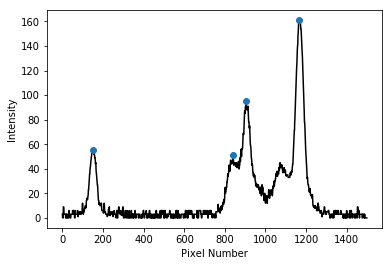

In [21]:
#Use SciPy to find peaks in the hydrogen spectrum. It will find too many.
#We need to identify the correct ones and remove the incorrect ones.
from scipy import signal
peak_widths = np.arange(1, 100)
indexes, _ = signal.find_peaks(profile_sumH, height = 50, distance = 50)
peak_count = len(indexes) # the number of peaks in the array
index_intensity = np.empty((0))
#print(indexes)
#for i in range(0, peak_count):
#    index_intensity = np.append(index_intensity, profile_sumH[indexes[i]])
plt.plot(profile_sumH, 'k')
plt.plot(indexes, profile_sumH[indexes], 'o')
#plt.axis([1150,1300, 0, 165])
plt.xlabel('Pixel Number')
plt.ylabel('Intensity')
plt.show()

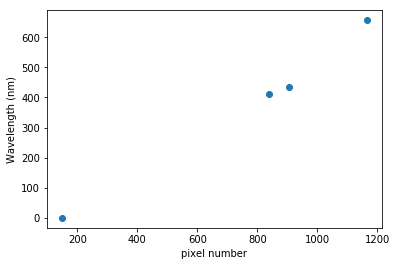

In [12]:
wl_listH = np.array([0,410.2,434.0,656.3])
plt.plot(indexes, wl_listH, 'o')
plt.xlabel('pixel number')
plt.ylabel('Wavelength (nm)')
#plt.axis([1150,1300, 0, 165])
plt.show()

We need to do a linear fit to this data to get a calibration for pixel distance from the central, undiffracted peak to known wavelengths.

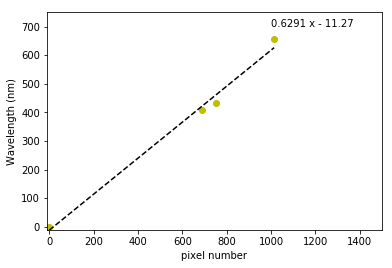

In [13]:
indexes_shifted = indexes-indexes[0]
fit = np.polyfit(indexes_shifted,wl_listH,1)
fit_fn = np.poly1d(fit) 

# fit_fn is now a function which takes in x and returns an estimate for y
plt.text(1000,700,fit_fn)
plt.plot(indexes_shifted, wl_listH, 'yo', indexes_shifted, fit_fn(indexes_shifted), '--k')
plt.xlim(-10, 1500)
plt.ylim(-10, 750)
plt.xlabel('pixel number')
plt.ylabel('Wavelength (nm)')
plt.show()

That calibration isn't so good. Hopefully, we can improve the hydrogen data in the future. In any case, we have a calibration, and we can plot our star spectrum vs. wavelength. First, we'll need to make an array that has the spectrum of the star. Then, we need to make a wavelength array that has the correct number of points and starts with x = 0 where the undiffracted star image is.

x rows = 300
y columns = 2000
z layers = 3


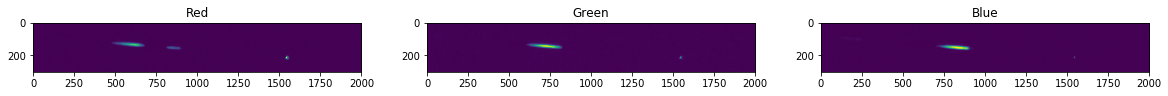

In [34]:
arrAltair = np.array(cropAltair)
x, y, z = arrAltair.shape
print("x rows =", x)
print("y columns =", y)
print("z layers =", z)

redAltair = np.array(cropAltair[:,:,0])
greenAltair = np.array(cropAltair[:,:,1])
blueAltair = np.array(cropAltair[:,:,2])

fig = plt.figure(figsize=(20, 20))
a=fig.add_subplot(1,3,1)
imgplot = plt.imshow(redAltair)
a.set_title('Red')
b=fig.add_subplot(1,3,2)
imgplot = plt.imshow(greenAltair)
b.set_title('Green')
c=fig.add_subplot(1,3,3)
imgplot = plt.imshow(blueAltair)
c.set_title('Blue')
plt.show()

xmin = linexA[0]
xmax = linexA[1]
ymin = lineyA[0]
ymax = lineyA[1]
slopeAltair = (ymax-ymin)/(xmax-xmin)
interceptAltair = ymax-slopeAltair*xmax

npts = xmax-xmin
profile_redAltair = np.zeros((npts))
profile_greenAltair = np.zeros((npts))
profile_blueAltair = np.zeros((npts))
for i in range(npts):
    pixelx = xmin + i
    pixely = round(slopeAltair * (xmin + i) + interceptAltair) # We need to round because it's a pixel.
#    print (pixelx)
#    print (pixely)
    profile_redAltair[i] = redAltair[pixely,pixelx]
    profile_greenAltair[i] = greenAltair[pixely,pixelx]
    profile_blueAltair[i] = blueAltair[pixely,pixelx]
profile_sumAltair = profile_redAltair + profile_greenAltair + profile_blueAltair

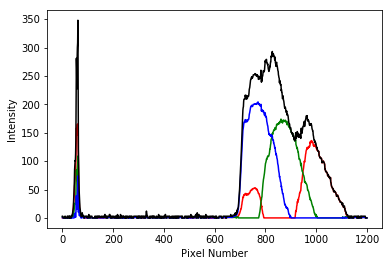

In [35]:
#Let's reverse the arrays so it goes from wavelength zero to higher values like we did for hydrogen.
profile_redAltair = profile_redAltair[::-1]
profile_greenAltair = profile_greenAltair[::-1]
profile_blueAltair = profile_blueAltair[::-1]
profile_sumAltair= profile_sumAltair[::-1]

plt.plot(profile_redAltair, 'r', profile_greenAltair, 'g', profile_blueAltair, 'b', profile_sumAltair, 'k')
plt.xlabel('Pixel Number')
plt.ylabel('Intensity')
plt.show()

It is strange that the blue channel has a red peak in it. Maybe that's because of the violet light at the far blue end of the spectrum. I'm going to plot only the undiffracted star to find the pixel where wavelength is zero. Then, we'll use the fit equation from hydrogen above to scale the pixels for Altair.

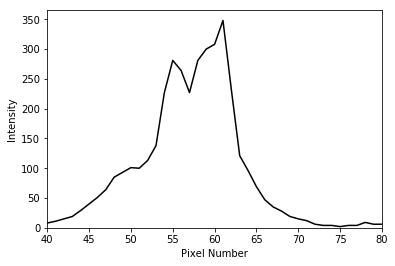

In [36]:
plt.plot(profile_sumAltair, 'k')
plt.xlabel('Pixel Number')
plt.ylabel('Intensity')
plt.axis([40,80, 0, 365])
plt.show()

We should probably fit a smooth curve to find the center, but I'm just going to call it 57 pixels. We might be off by $\pm 5$ pixels.

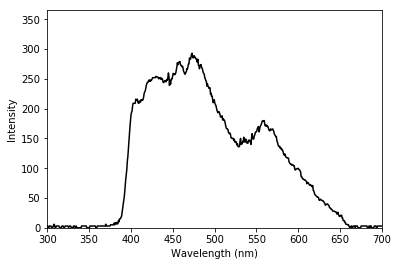

In [39]:
wavelengthAltair = np.zeros(1200)
for i in range(0,1200):
    wavelengthAltair[i] = 0.6291*(i-57)-11.27

plt.plot(wavelengthAltair, profile_sumAltair, 'k')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.axis([300,700, 0, 365])
plt.show()

Now, lets use scipy to do an interpolation. This will give a smoother profile with more data points, as many as we want, in fact. I found this tutorial https://stackoverflow.com/questions/7878398/how-to-extract-an-arbitrary-line-of-values-from-a-numpy-array

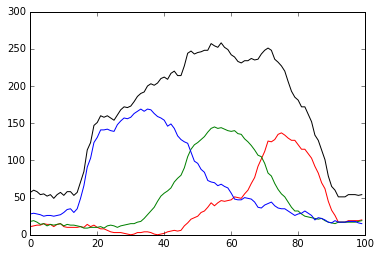

In [21]:
#-- Extract the line...
# Make a line with "num" points...
num = 100
x, y = np.linspace(xmin, xmax, num), np.linspace(ymin, ymax, num)

#z_red = np.arange(num,dtype='int64')
#z_green = np.arange(num,dtype='int64')
#z_blue = np.arange(num,dtype='int64')
#z_sum = np.arange(num,dtype='int64')

# Extract the values along the line, using cubic interpolation
z_red = scipy.ndimage.map_coordinates(rarr, np.vstack((y,x))) #The vstack creates a set of coordinates based upon the image's x and y we chose for the line
z_green = scipy.ndimage.map_coordinates(garr, np.vstack((y,x))) # The map_coordinates does an interpolation to try and best-guess the image value based upon surrounding pixels
z_blue = scipy.ndimage.map_coordinates(barr, np.vstack((y,x)))

#I can't seem to force the array to be long integer, and it's overflowing
#The quick solution is to divide each array first.
z_sum = 3*(z_red/3 + z_green/3 + z_blue/3)

#Let's reverse them
z_red = z_red[::-1]
z_green = z_green[::-1]
z_blue = z_blue[::-1]
z_sum = z_sum[::-1]

#Let's plot all of it
plt.plot(z_red, 'r', z_green, 'g', z_blue, 'b', z_sum, 'k')
plt.show()

Suppose we want to fit the blackbody spectrum to this summed spectrum. We first need to create an x-axis that is frequency or wavelength. I am going to use wavelength. We will need to use a known spectrum to calibrate. I found this response curve online. The blue line shows the built-in response of the camera. It is important to keep in mind that this response and the data collected (image of sun) are convolved mathematically. It is possible to deconvolve them if we have a careful measurement of the response. However, we will not do this. Looking at the response, we see that the camera's sensitive to about 400 nm to 650 nm. Our endpoints should be somewhere near this once we calibrate. The stuff in the IR above 1100 nm is resonance from the filter coating.

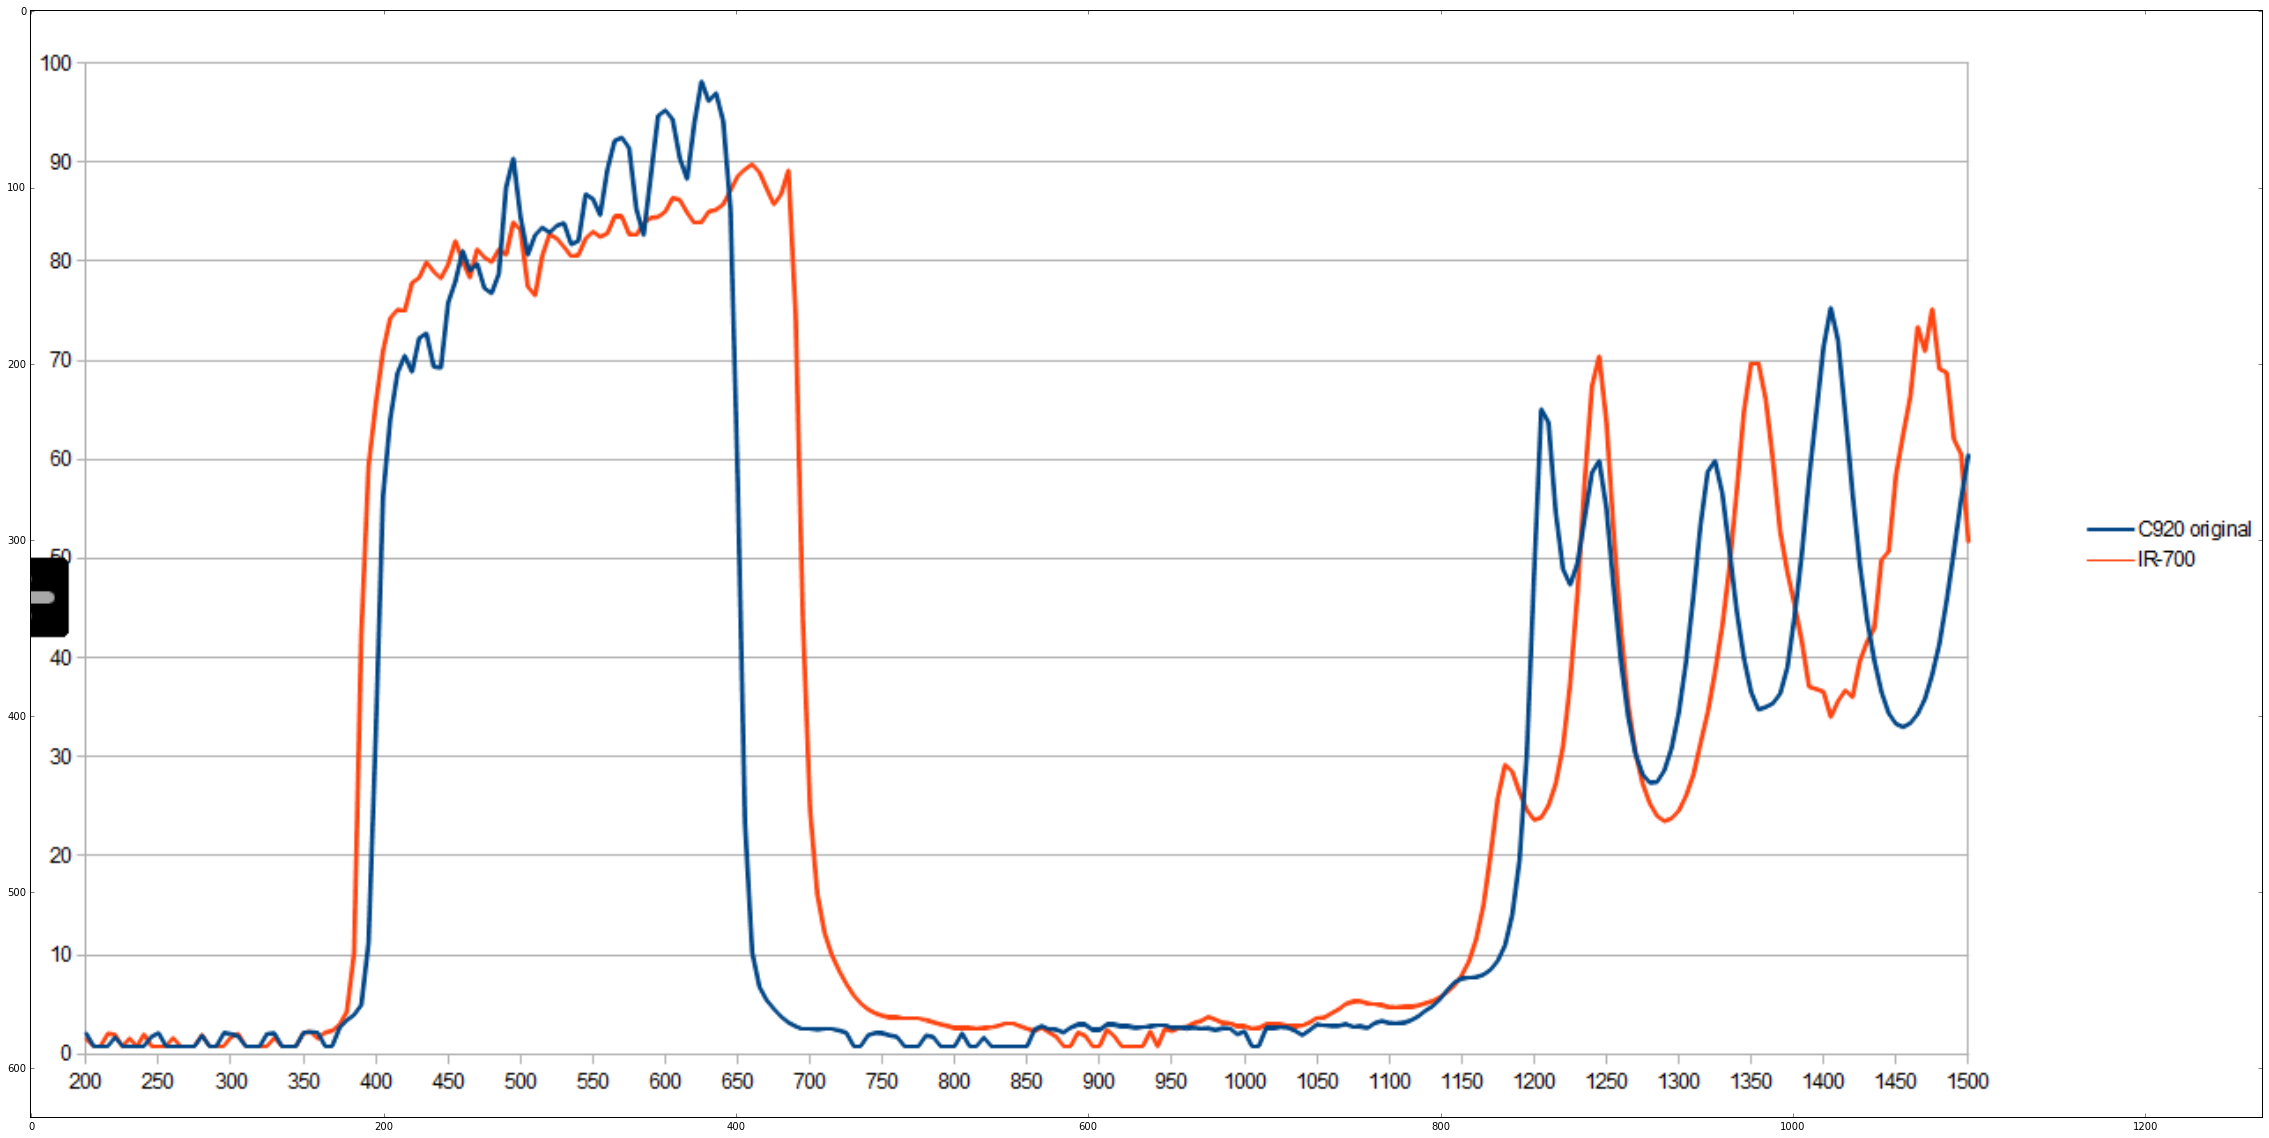

In [9]:
C920 = imread("C920-vs-IR700.png",flatten=0)
figC920 = plt.figure(figsize=(40, 60))
imgplot = plt.imshow(C920)
plt.show()

 To attempt to calibrate, I am going to use two laser pointers, red 633 nm and green 510 nm. 

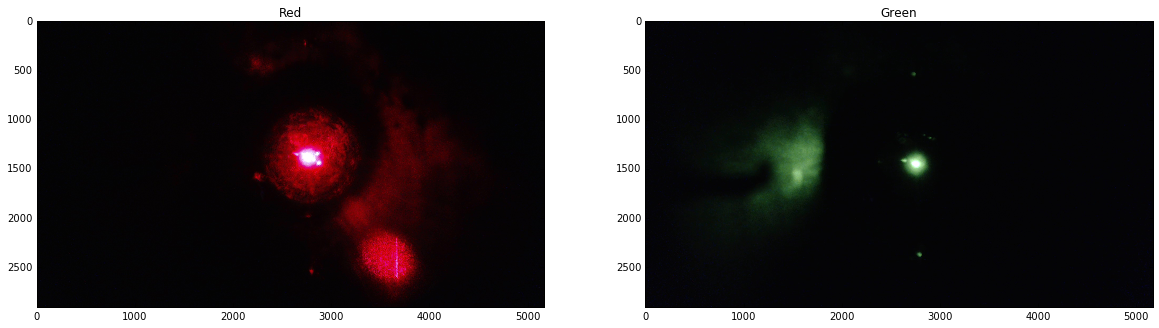

In [100]:
redlaser = imread("RedLaser2.jpg",flatten=0)
greenlaser = imread("GreenLaser.jpg",flatten=0)
fig = plt.figure(figsize=(20, 20))
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(redlaser)
a.set_title('Red')
b=fig.add_subplot(1,2,2)
imgplot = plt.imshow(greenlaser)
b.set_title('Green')
plt.show()

Unfortunately, the laser spots don't land on the line of the solar spectrum. Although the solar spectrum has a slight x-dependence, the laser spots do not. Let's assume the spectrum runs vertically in the image. Then, the wavelength is directly tied to the y-pixels of the image. When the wavelength is 633, the pixel is 240. When the wavelength is 510 nm, the pixel is 547. Assuming a linear translation, we can fit a line to these two data points.

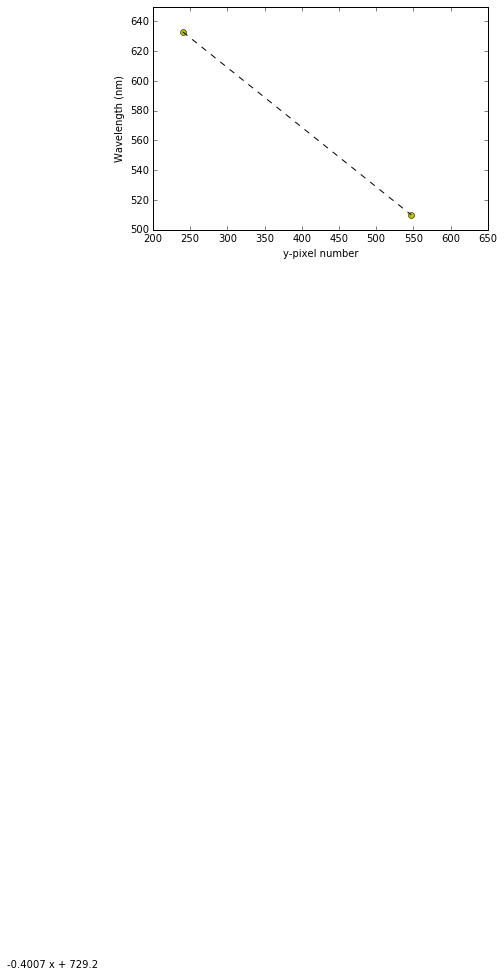

Now we have a conversion $$\lambda = -0.4007 \rm{y-pixel} + 729.2.$$ Let's create a wavelength array from our y array and replot our spectrum.

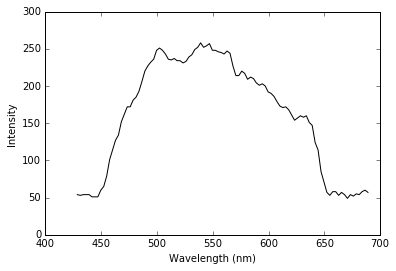

In [128]:
wavelength = -0.4007*y+729.2
wavelength = wavelength[::--1] # Don't forget to reverse it!
plt.plot(wavelength, z_sum, 'k')
plt.ylabel('Intensity')
plt.xlabel('Wavelength (nm)')
plt.show()

Once calibrated, you can fit the blackbody spectrum and identify Fraunhofer lines. You should do some research to understand what Fraunhofer lines are. Here is a plot of the solar spectrum with labeled Fraunhofer lines.

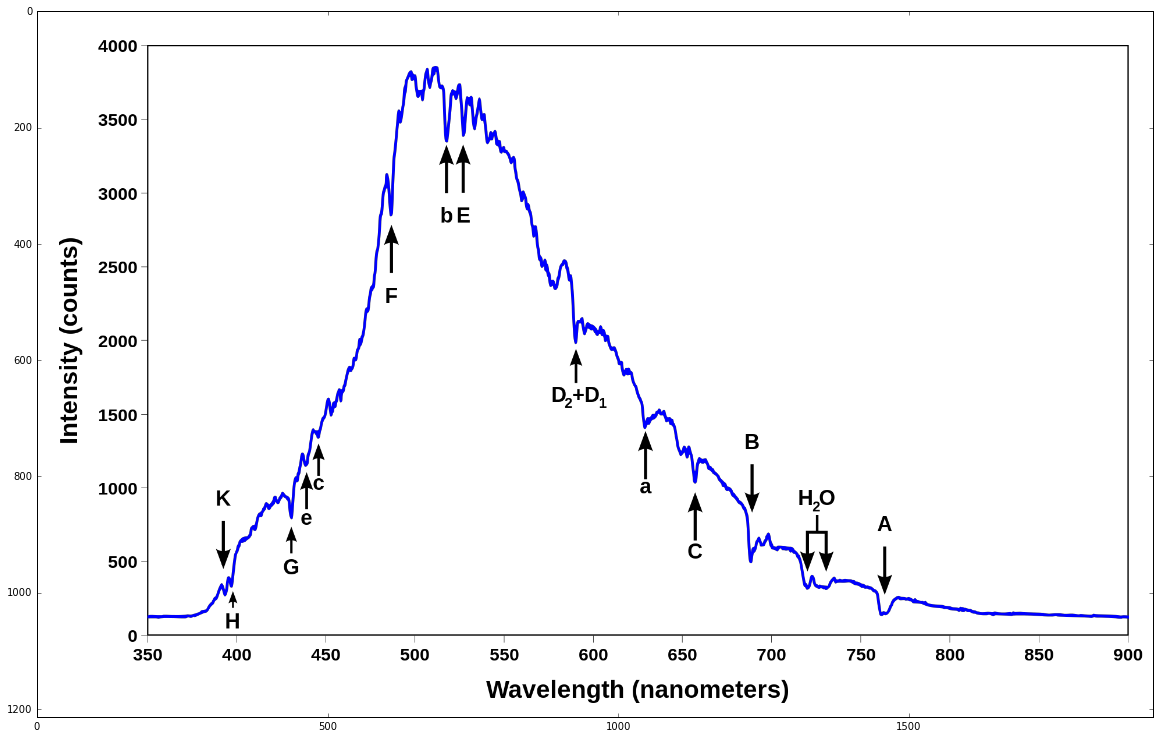

In [13]:
Fraun = imread("Fraunhofer.png",flatten=0)
figFraun = plt.figure(figsize=(20, 7))
imgplot = plt.imshow(Fraun)
plt.show()